In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

%matplotlib inline

In [2]:
# Reading the file

df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\ScottishPower\\SP_Loss_Data.csv')

In [3]:
df

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,...,MosaicGroup,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold
0,08/05/2024,1,20/02/2014,Domestic,No,488.17,Cash,Monthly,NaN,NaN,...,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1
1,15/05/2024,1,19/11/2022,Domestic,No,27.88,Cash,Monthly,NaN,NaN,...,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2
2,29/05/2024,1,31/05/2023,Domestic,No,66.87,Cash,Monthly,NaN,NaN,...,Rental Hubs,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2
3,06/05/2024,1,24/09/2013,Domestic,No,46.65,Cash,Quarterly,NaN,NaN,...,Municipal Tenants,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2
4,16/05/2024,1,06/04/2019,Domestic,No,1145.62,Cash,Monthly,NaN,NaN,...,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31/12/9999,0,14/07/2021,Domestic,No,4.22,DD,Monthly,NaN,NaN,...,Domestic Success,Cafes and Catchments,Affluent families with growing children living...,Upmarket Browsers,Affluent older families in suburban areas with...,Growth Phase,Mid-way Mortgages,47663,Semi-Detached,2
4996,31/12/9999,0,08/08/2022,Domestic,No,72.77,DD,Monthly,NaN,NaN,...,Transient Renters,Value Rentals,"Younger singles and couples, some with childre...",Online Escapists,Singles and families with squeezed finances us...,Earning Potential,Living Wage Youth,12950,Semi-Detached,1
4997,31/12/9999,0,16/06/2015,Domestic,Yes,30.24,Cash,Monthly,NaN,NaN,...,Municipal Tenants,Inner City Stalwarts,Long-term renters of inner city social flats w...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Ageing Basics,15725,Terraced,2
4998,31/12/9999,0,20/02/2017,Domestic,No,18.00,DD,Monthly,NaN,NaN,...,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Earning Potential,Domestic Startups,67138,Semi-Detached,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LossDate                   5000 non-null   object 
 1   Loss                       5000 non-null   int64  
 2   AccountStartdate           5000 non-null   object 
 3   AccountDeterminationGroup  5000 non-null   object 
 4   InstallmentPlan            4946 non-null   object 
 5   OffsetValue                5000 non-null   float64
 6   DebtPlanGroup              5000 non-null   object 
 7   PaymentFrequency           5000 non-null   object 
 8   ComplaintType              979 non-null    object 
 9   StatusGrouping             979 non-null    object 
 10  CustomerCategory           5000 non-null   object 
 11  CustomerType               5000 non-null   object 
 12  PreferredContactMethod     5000 non-null   object 
 13  OfgemCodeRisk              5000 non-null   objec

In [5]:
# Convert start dates to datetime

df['AccountStartdate'] = pd.to_datetime(df['AccountStartdate'], format='%d/%m/%Y', errors='coerce')

In [6]:
# Define a function to replace the placeholder end date

def adjust_end_date(date):
    if pd.isna(date):
        return pd.to_datetime('today')  # Replace with today's date
    else:
        dt = pd.to_datetime(date, format='%d/%m/%Y', errors='coerce')
        if dt is pd.NaT or dt.year >= 9999:
            return pd.to_datetime('today')  # Replace with today's date
        else:
            return dt

In [7]:
# Applying the above function to the end date

df['LossDate'] = df['LossDate'].apply(adjust_end_date)

In [8]:
# Calculate tenure in months

df['tenure_months'] = ((df['LossDate'] - df['AccountStartdate']) / np.timedelta64(1, 'M')).astype(int)

In [9]:
df

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,...,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months
0,2024-05-08 00:00:00.000000,1,2014-02-20,Domestic,No,488.17,Cash,Monthly,NaN,NaN,...,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,120
1,2024-05-15 00:00:00.000000,1,2022-11-19,Domestic,No,27.88,Cash,Monthly,NaN,NaN,...,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,17
2,2024-05-29 00:00:00.000000,1,2023-05-31,Domestic,No,66.87,Cash,Monthly,NaN,NaN,...,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2,11
3,2024-05-06 00:00:00.000000,1,2013-09-24,Domestic,No,46.65,Cash,Quarterly,NaN,NaN,...,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2,125
4,2024-05-16 00:00:00.000000,1,2019-04-06,Domestic,No,1145.62,Cash,Monthly,NaN,NaN,...,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-09-03 19:45:53.358099,0,2021-07-14,Domestic,No,4.22,DD,Monthly,NaN,NaN,...,Cafes and Catchments,Affluent families with growing children living...,Upmarket Browsers,Affluent older families in suburban areas with...,Growth Phase,Mid-way Mortgages,47663,Semi-Detached,2,37
4996,2024-09-03 19:45:53.358099,0,2022-08-08,Domestic,No,72.77,DD,Monthly,NaN,NaN,...,Value Rentals,"Younger singles and couples, some with childre...",Online Escapists,Singles and families with squeezed finances us...,Earning Potential,Living Wage Youth,12950,Semi-Detached,1,24
4997,2024-09-03 19:45:53.358099,0,2015-06-16,Domestic,Yes,30.24,Cash,Monthly,NaN,NaN,...,Inner City Stalwarts,Long-term renters of inner city social flats w...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Ageing Basics,15725,Terraced,2,108
4998,2024-09-03 19:45:53.358099,0,2017-02-20,Domestic,No,18.00,DD,Monthly,NaN,NaN,...,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Earning Potential,Domestic Startups,67138,Semi-Detached,2,88


In [10]:
# Checking the missing values 

missing_values = df.isnull().sum()

# Display column names with missing values

print(missing_values[missing_values > 0])

InstallmentPlan      54
ComplaintType      4021
StatusGrouping     4021
dtype: int64


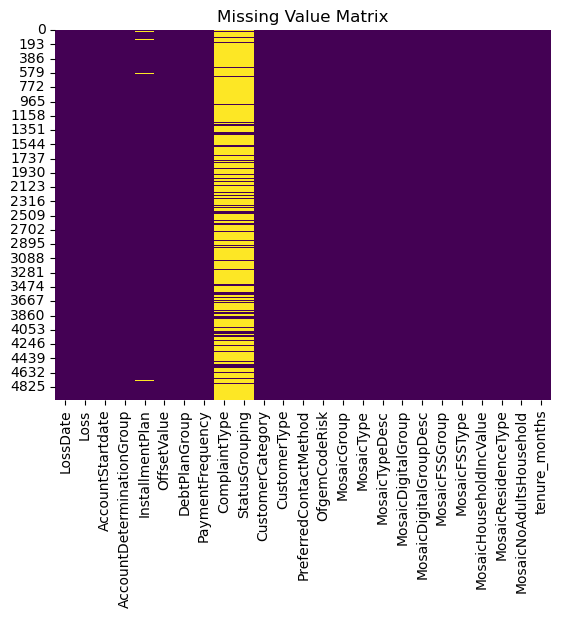

In [11]:
# Visualising the missing values

sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Matrix')
plt.show()

In [12]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with mode imputation
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data
imputer.fit(df[['InstallmentPlan', 'ComplaintType', 'StatusGrouping']])

# Impute the missing values
df[['InstallmentPlan', 'ComplaintType', 'StatusGrouping']] = imputer.transform(df[['InstallmentPlan', 'ComplaintType', 'StatusGrouping']])

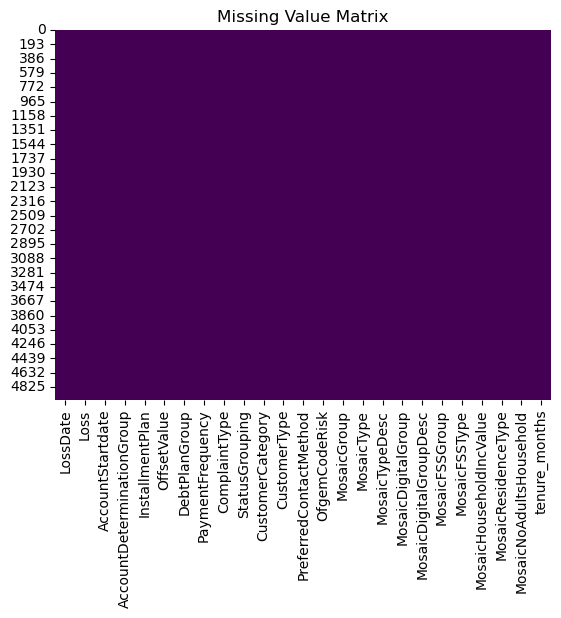

In [13]:
# Visualising the missing values after handling

sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Matrix')
plt.show()

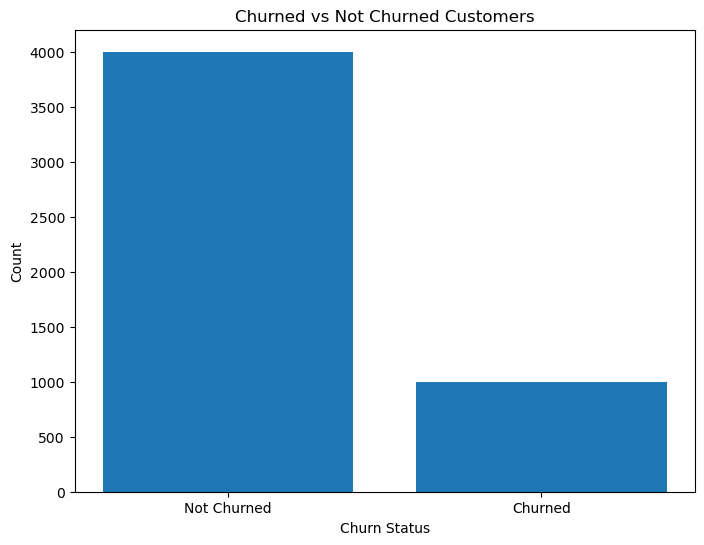

In [14]:
churn_counts = df['Loss'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churned vs Not Churned Customers')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure Months')

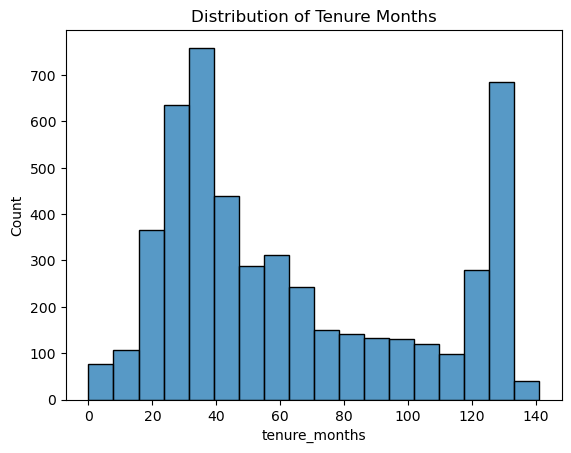

In [15]:
# Plot distribution of tenure_months
sns.histplot(df['tenure_months']).set_title('Distribution of Tenure Months')

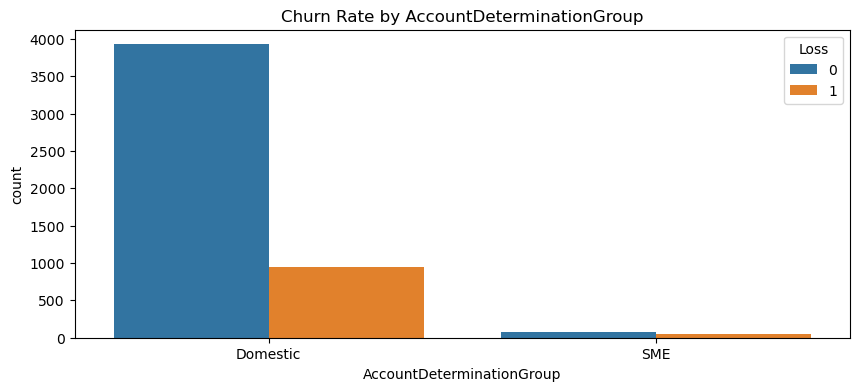

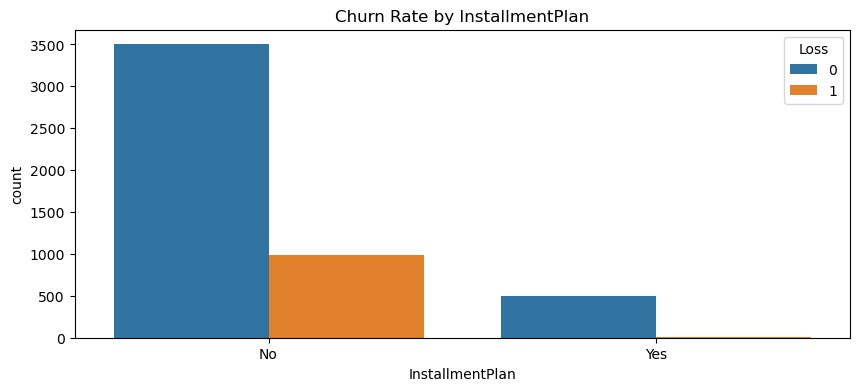

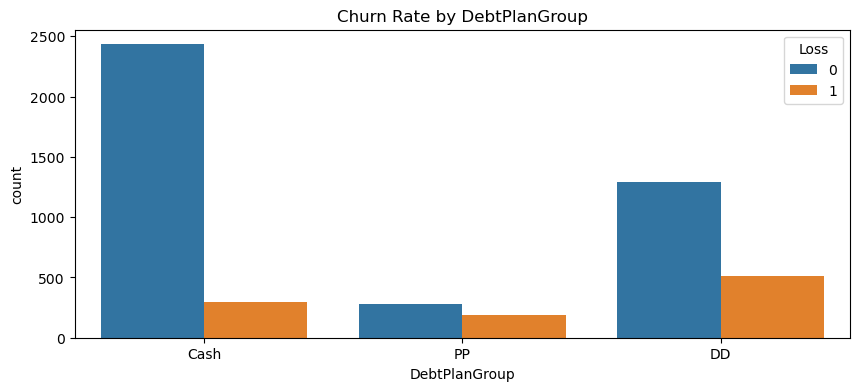

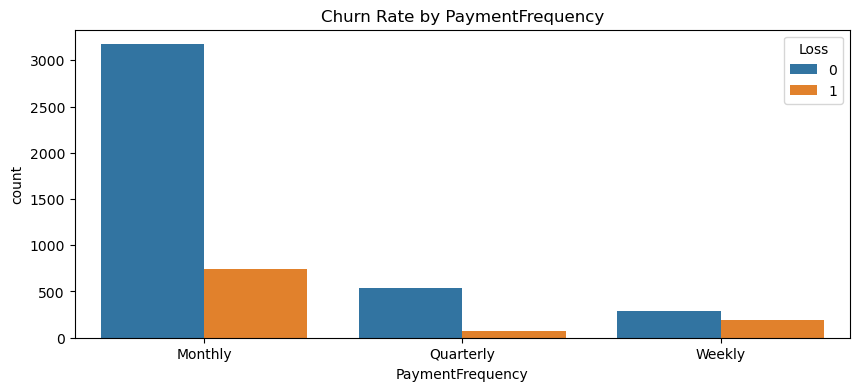

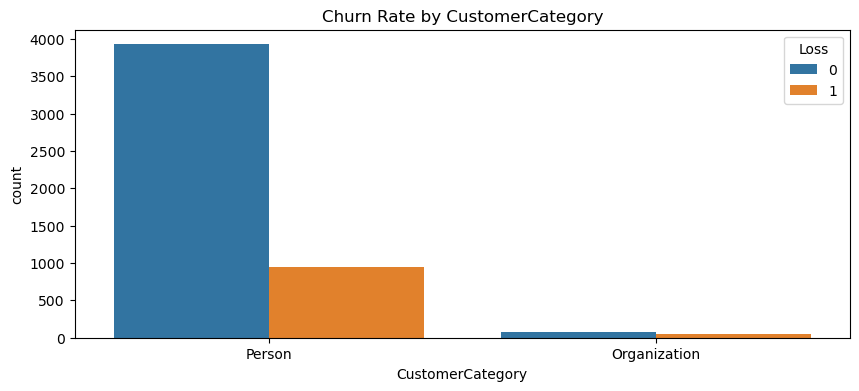

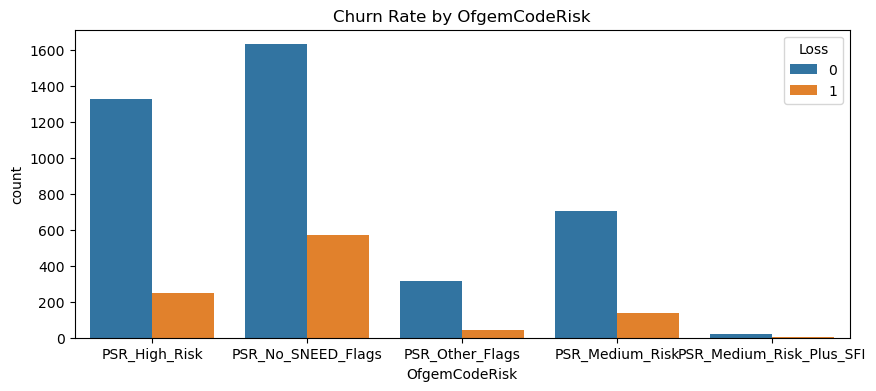

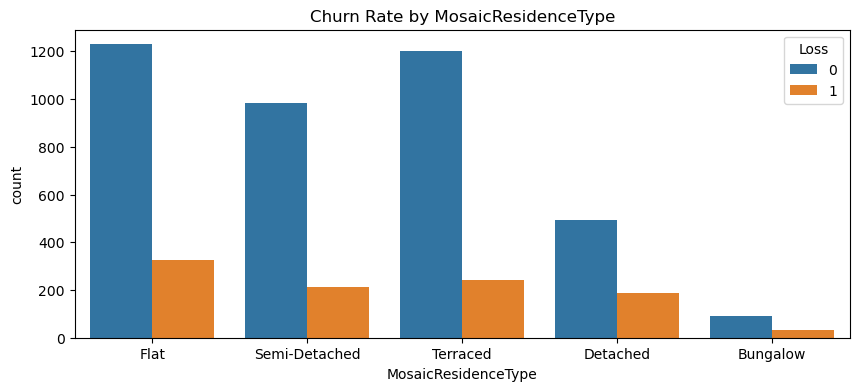

In [16]:
# Count plot for categorical data against churn
for col in ['AccountDeterminationGroup', 'InstallmentPlan', 'DebtPlanGroup', 'PaymentFrequency', 'CustomerCategory',
           'OfgemCodeRisk', 'MosaicResidenceType']:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Loss', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.show()

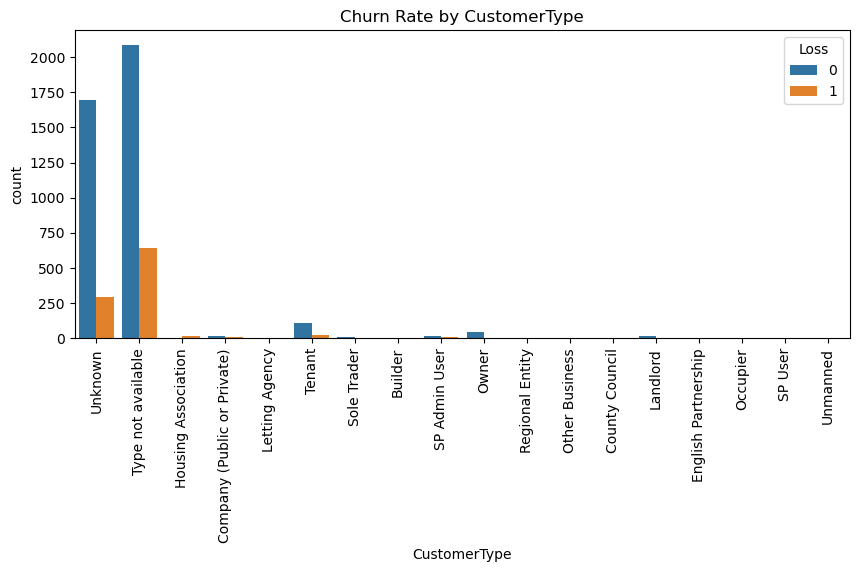

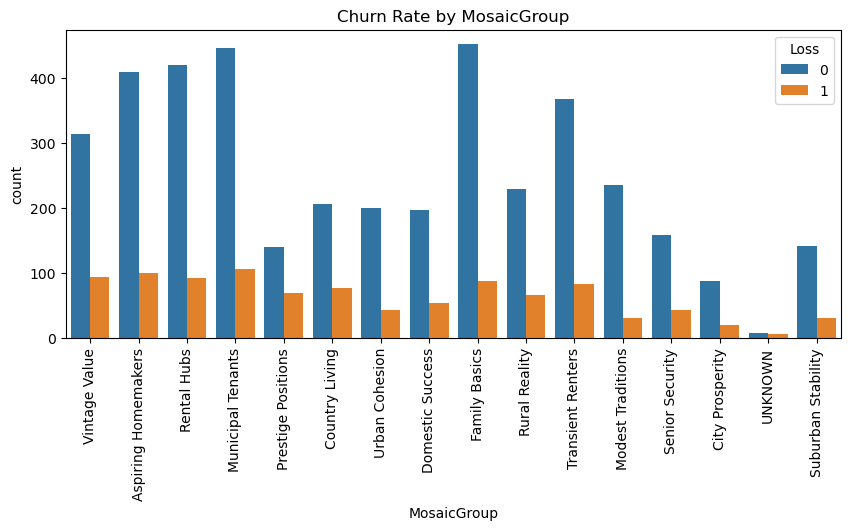

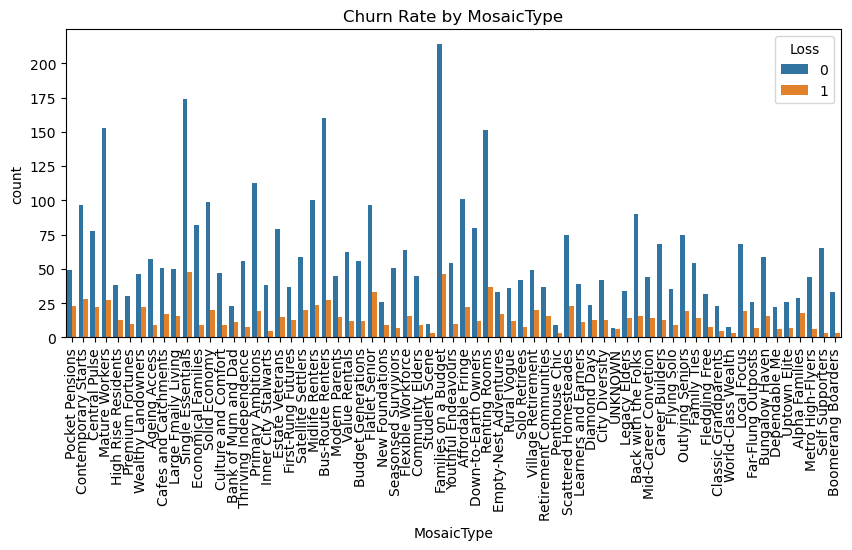

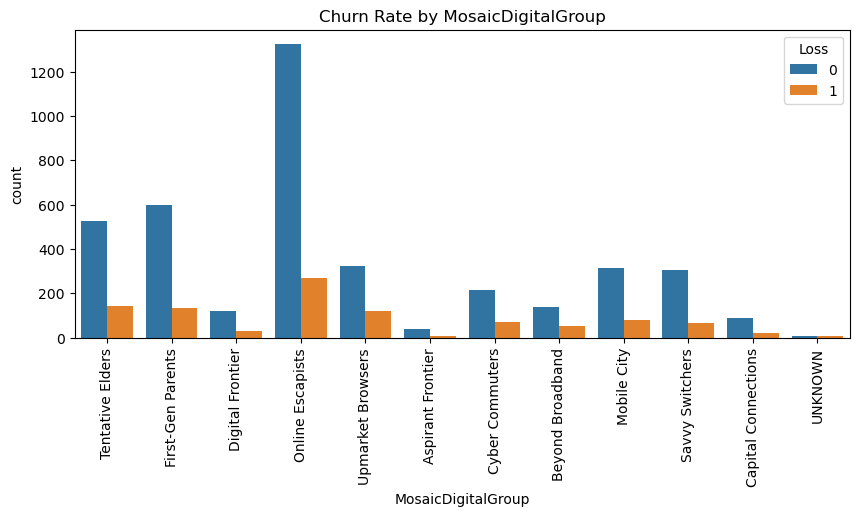

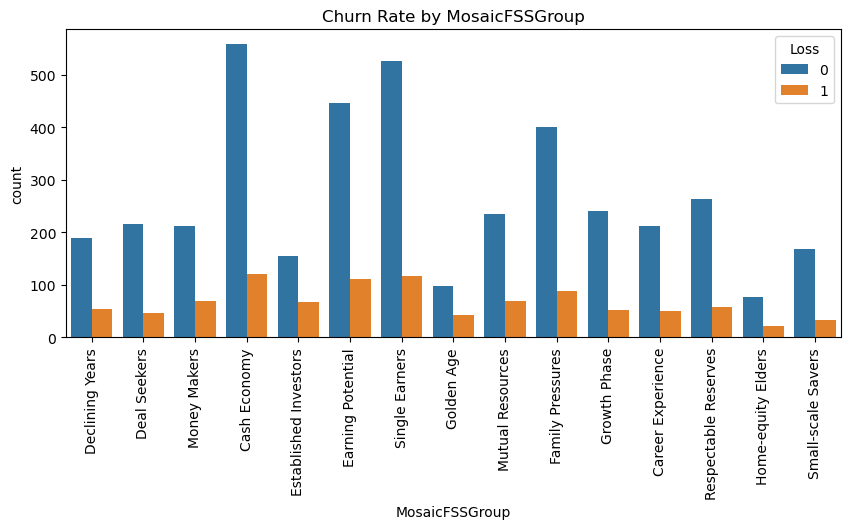

In [17]:
# Count plot for other categorical data that has more categories against churn
for col in ['CustomerType', 'MosaicGroup', 'MosaicType', 'MosaicDigitalGroup', 'MosaicFSSGroup',
           ]:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Loss', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=90)
    plt.show()

In [18]:
# Checking the Unique Values in categorical variables

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")
    print(f"Number of unique values in '{col}': {df[col].nunique()}")
    print("---------------------------------------------------------")

Unique values in 'AccountDeterminationGroup': ['Domestic' 'SME']
Number of unique values in 'AccountDeterminationGroup': 2
---------------------------------------------------------
Unique values in 'InstallmentPlan': ['No' 'Yes']
Number of unique values in 'InstallmentPlan': 2
---------------------------------------------------------
Unique values in 'DebtPlanGroup': ['Cash' 'PP' 'DD']
Number of unique values in 'DebtPlanGroup': 3
---------------------------------------------------------
Unique values in 'PaymentFrequency': ['Monthly' 'Quarterly' 'Weekly']
Number of unique values in 'PaymentFrequency': 3
---------------------------------------------------------
Unique values in 'ComplaintType': ['Complaint' 'Ombudsman']
Number of unique values in 'ComplaintType': 2
---------------------------------------------------------
Unique values in 'StatusGrouping': ['Closed' 'Open' 'Reopen']
Number of unique values in 'StatusGrouping': 3
---------------------------------------------------------

In [19]:
# Churn Rate

total_customers = len(df)
churned_customers = len(df[df['Loss'] == 1])
churn_rate = (churned_customers / total_customers) * 100
print(f'Churn Rate: {churn_rate:.2f}%')


Churn Rate: 20.00%


In [20]:
# Convert date columns to datetime
df['AccountStartdate'] = pd.to_datetime(df['AccountStartdate'])
df['LossDate'] = pd.to_datetime(df['LossDate'])

# Convert date columns to datetime
df['AccountStartdate'] = pd.to_datetime(df['AccountStartdate'])
df['LossDate'] = pd.to_datetime(df['LossDate'])

# Assume each entry in df represents a churn if 'LossDate' is not NaT (not a time)
df['Churn'] = ~df['LossDate'].isna()

# Group by Account Start Month and calculate new accounts and churns
monthly_data = df.groupby(df['AccountStartdate'].dt.to_period('M')).agg(
    new_accounts=('AccountStartdate', 'count'),
    churns=('Churn', 'sum')
).reset_index()

# Calculate churn rate per month
monthly_data['churn_rate'] = monthly_data['churns'] / monthly_data['new_accounts']

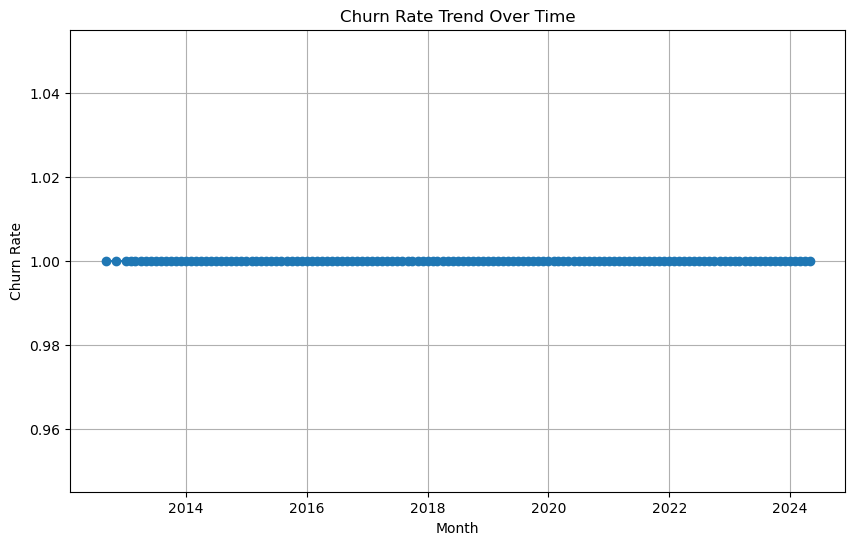

In [21]:
monthly_data['AccountStartdate'] = monthly_data['AccountStartdate'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['AccountStartdate'], monthly_data['churn_rate'], marker='o')
plt.title('Churn Rate Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

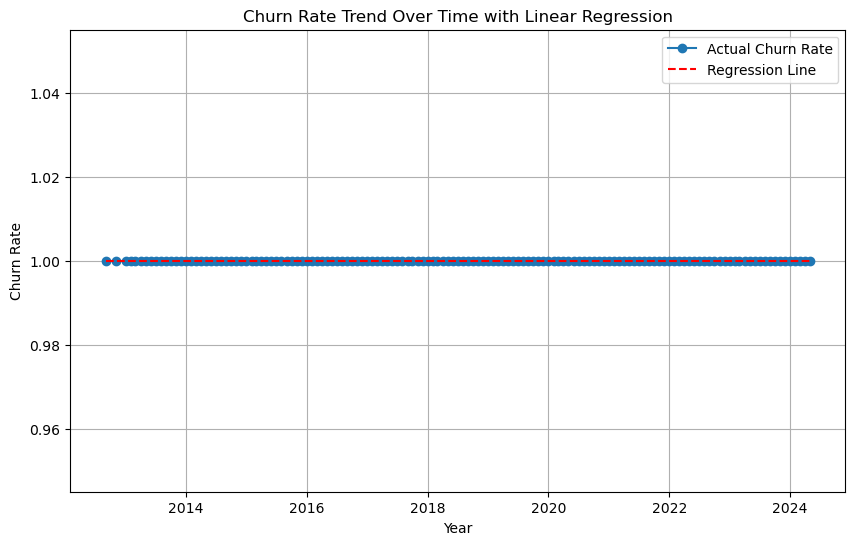

The churn rate trend is stable.


In [22]:
# Same Churn Rate Trend with Regression Line

import matplotlib.dates as mdates
dates_numeric = mdates.date2num(monthly_data['AccountStartdate'])

# Perform linear regression
slope, intercept = np.polyfit(dates_numeric, monthly_data['churn_rate'], 1)

# Predict values using the regression model
fit_line = np.polyval([slope, intercept], dates_numeric)

# Plot original churn rates
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['AccountStartdate'], monthly_data['churn_rate'], marker='o', label='Actual Churn Rate')
plt.plot(monthly_data['AccountStartdate'], fit_line, 'r--', label='Regression Line')

# Add titles and labels
plt.title('Churn Rate Trend Over Time with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.legend()
plt.grid(True)
plt.show()

# Print trend based on slope
if slope > 0:
    trend = "increasing"
elif slope < 0:
    trend = "decreasing"
else:
    trend = "stable"

print(f"The churn rate trend is {trend}.")

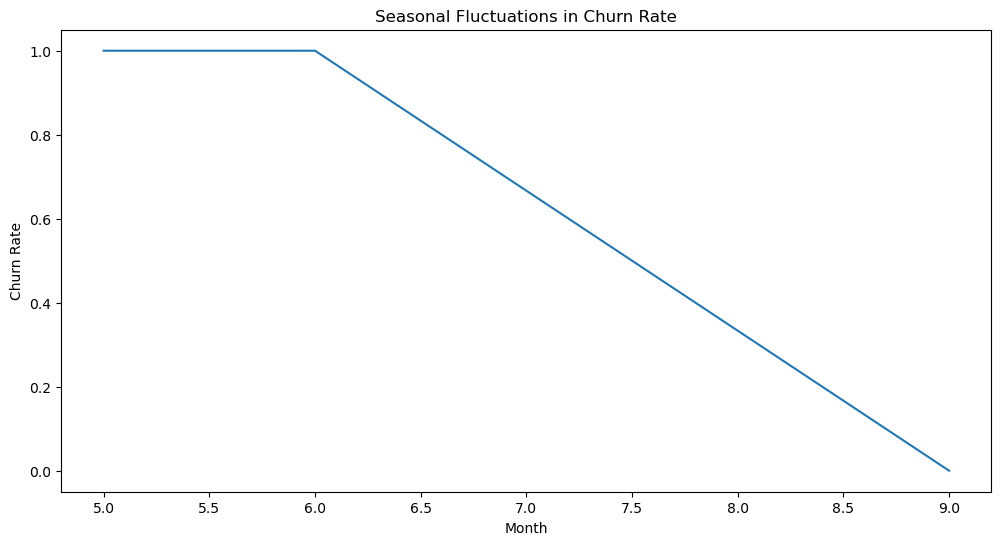

In [23]:
# Seasonal fluctuations

# Convert the 'customer left the company date' column to datetime format
df['LossDate'] = pd.to_datetime(df['LossDate'])

# Extract the month from the date
df['month'] = df['LossDate'].dt.month

# Group the data by month and calculate the churn rate
churn_rate_by_month = df.groupby('month')['Loss'].mean()

# Plot the churn rate by month
plt.figure(figsize=(12, 6))
plt.plot(churn_rate_by_month.index, churn_rate_by_month.values)
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.title('Seasonal Fluctuations in Churn Rate')
plt.show()

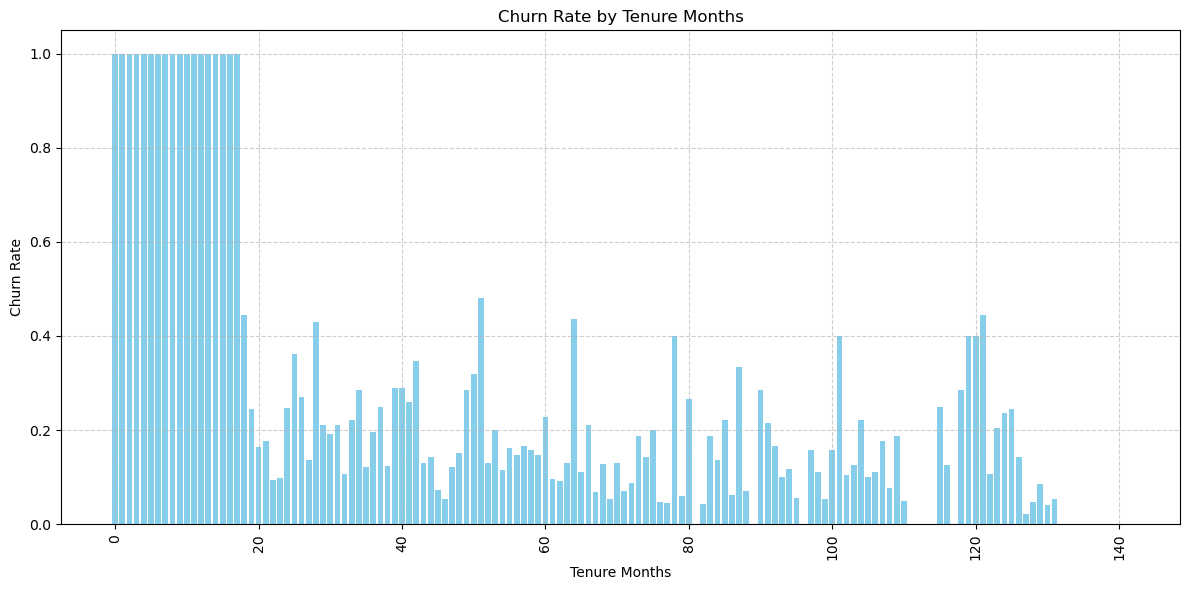

In [24]:
# Plotting the Customer type separately

df['tenure_months'] = pd.to_numeric(df['tenure_months'], errors='coerce')

# Group by 'tenure_months' and calculate mean churn rate
tenure_churn_rate = df.groupby('tenure_months')['Loss'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(tenure_churn_rate.index, tenure_churn_rate.values, color='skyblue')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Months')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=90)  # Rotate labels if there are many to prevent overlap
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Customer Segmentation

In [25]:
# Segment customers based on tenure
short_tenure_customers = df[df['tenure_months'] < 20]
long_tenure_customers = df[df['tenure_months'] >= 20]

# Quick check on the distribution of 'Loss' in these segments
print(short_tenure_customers['Loss'].mean())  # Churn rate for short tenure
print(long_tenure_customers['Loss'].mean())   # Churn rate for long tenure

0.7849829351535836
0.16358614828978119


# Analysis for Short Tenure Customers

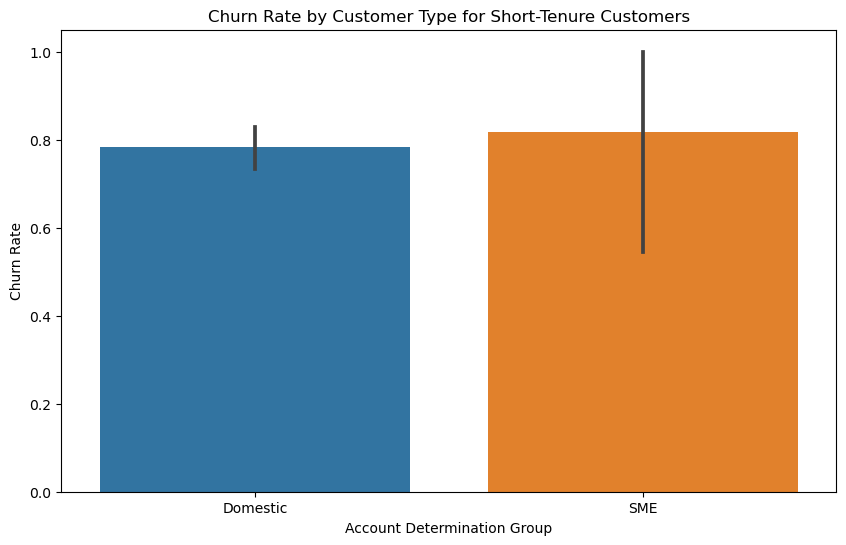

In [26]:
# Demographic Analysis

# Analyze customer type in short-tenure customers
plt.figure(figsize=(10, 6))
sns.barplot(x='AccountDeterminationGroup', y='Loss', data=short_tenure_customers, edgecolor='none')
plt.xlabel('Account Determination Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Type for Short-Tenure Customers')
plt.show()

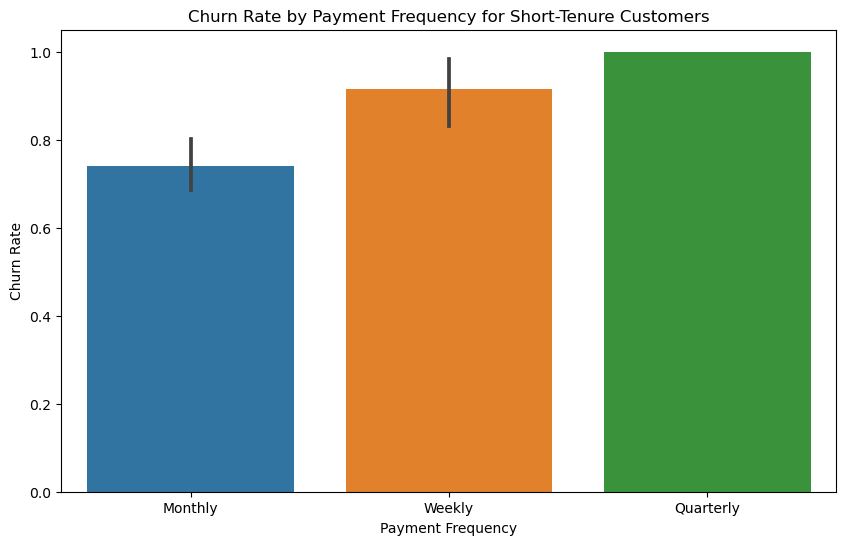

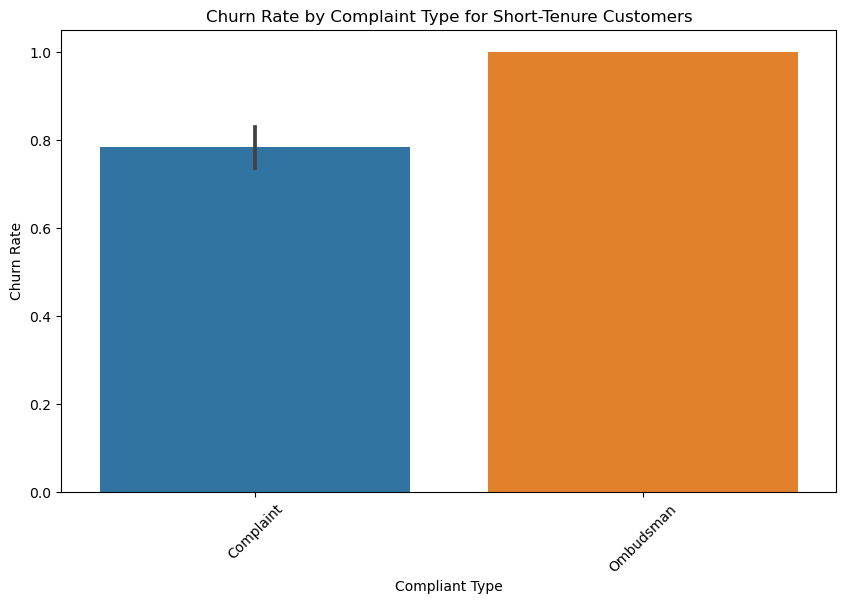

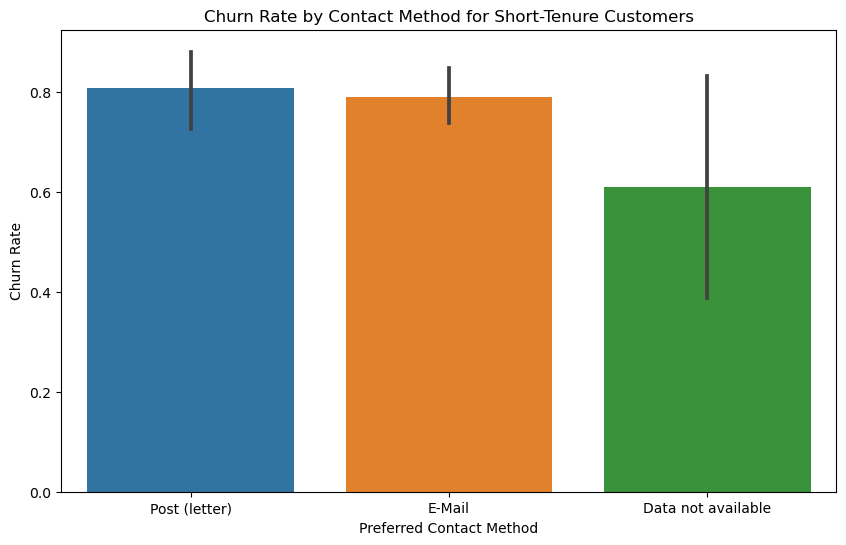

In [27]:
# Behavioural Analysis

# Payment frequency analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentFrequency', y='Loss', data=short_tenure_customers)
plt.title('Churn Rate by Payment Frequency for Short-Tenure Customers')
plt.xlabel('Payment Frequency')
plt.ylabel('Churn Rate')
plt.show()

# Complaint type analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='ComplaintType', y='Loss', data=short_tenure_customers)
plt.title('Churn Rate by Complaint Type for Short-Tenure Customers')
plt.xlabel('Compliant Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

# Preferred Contact Methods
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredContactMethod', y='Loss', data=short_tenure_customers)
plt.title('Churn Rate by Contact Method for Short-Tenure Customers')
plt.xlabel('Preferred Contact Method')
plt.ylabel('Churn Rate')
plt.show()

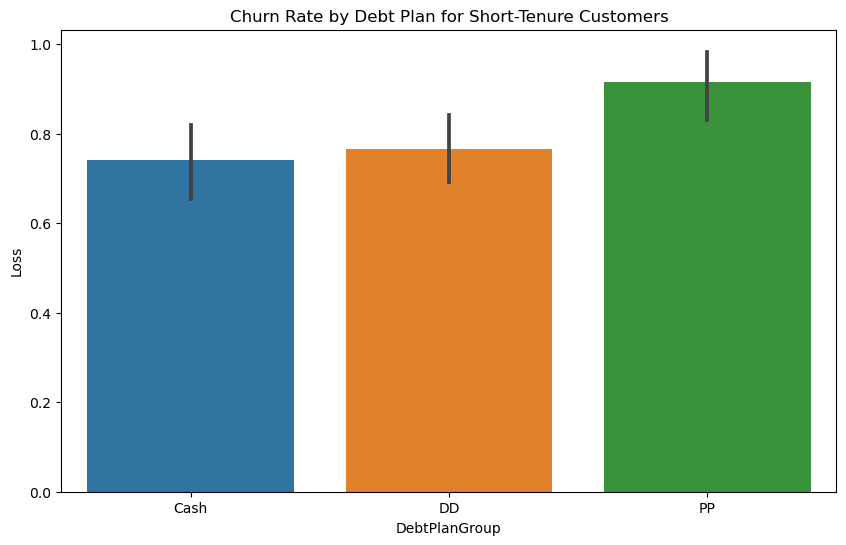

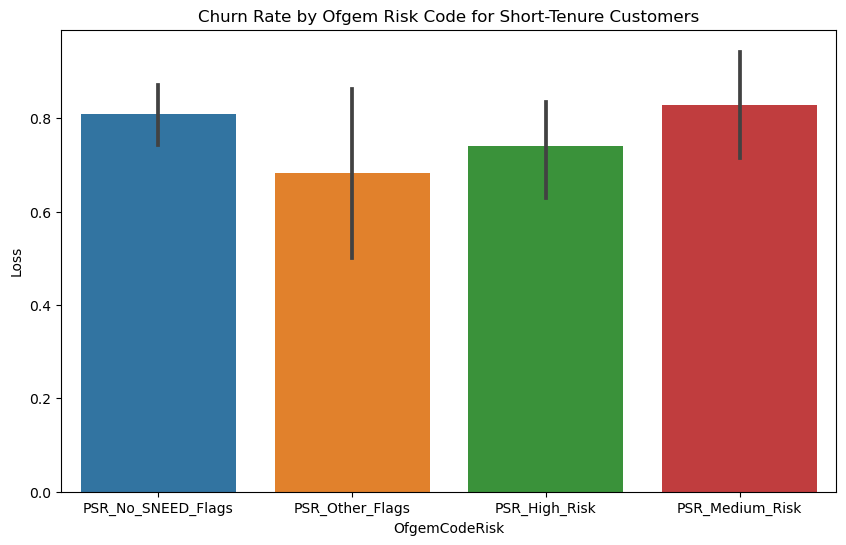

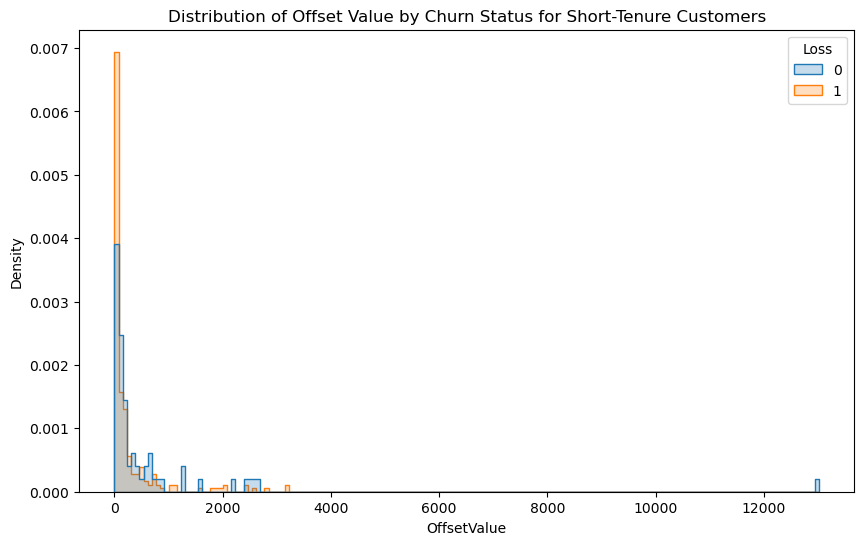

In [28]:
# Risk and Financial Analysis

# Analyze Debt Plan
plt.figure(figsize=(10, 6))
sns.barplot(x='DebtPlanGroup', y='Loss', data=short_tenure_customers)
plt.title('Churn Rate by Debt Plan for Short-Tenure Customers')
plt.show()

# Analyze risk code
plt.figure(figsize=(10, 6))
sns.barplot(x='OfgemCodeRisk', y='Loss', data=short_tenure_customers)
plt.title('Churn Rate by Ofgem Risk Code for Short-Tenure Customers')
plt.show()

# Offset value analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=short_tenure_customers, x='OffsetValue', hue='Loss', element='step', stat='density', common_norm=False)
plt.title('Distribution of Offset Value by Churn Status for Short-Tenure Customers')
plt.show()

# Analysis for Long tenure customers

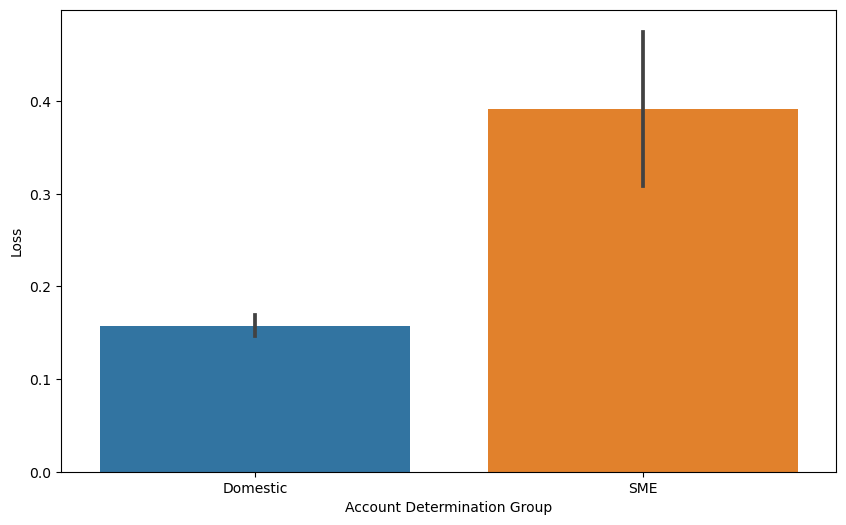

In [29]:

# Demographic Analysis

# Analyze customer type in long-tenure customers
plt.figure(figsize=(10, 6))
sns.barplot(x='AccountDeterminationGroup', y='Loss', data=long_tenure_customers, edgecolor='none')
plt.xlabel('Account Determination Group')
plt.show()

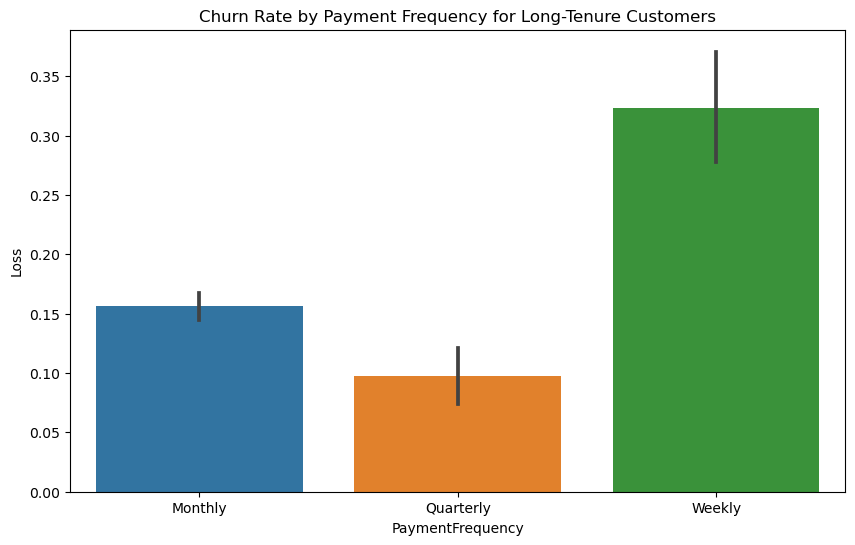

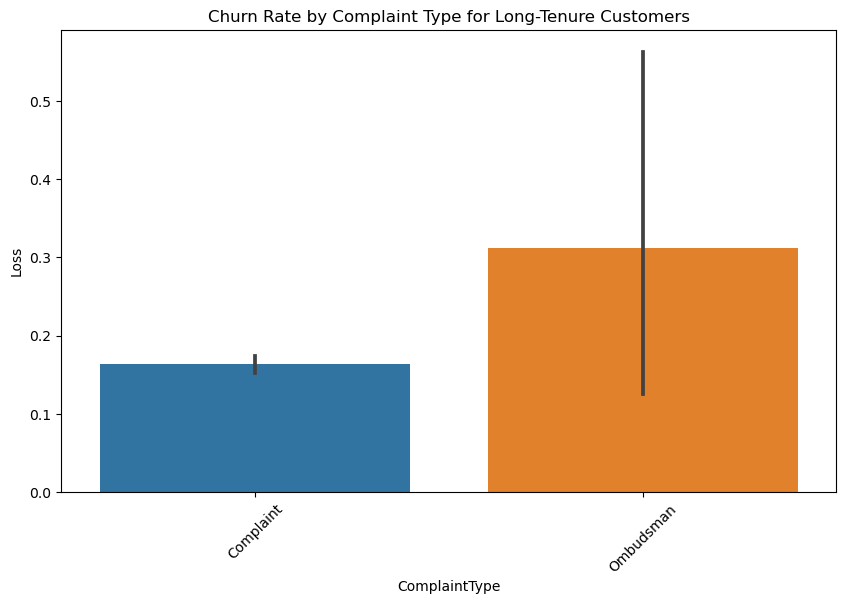

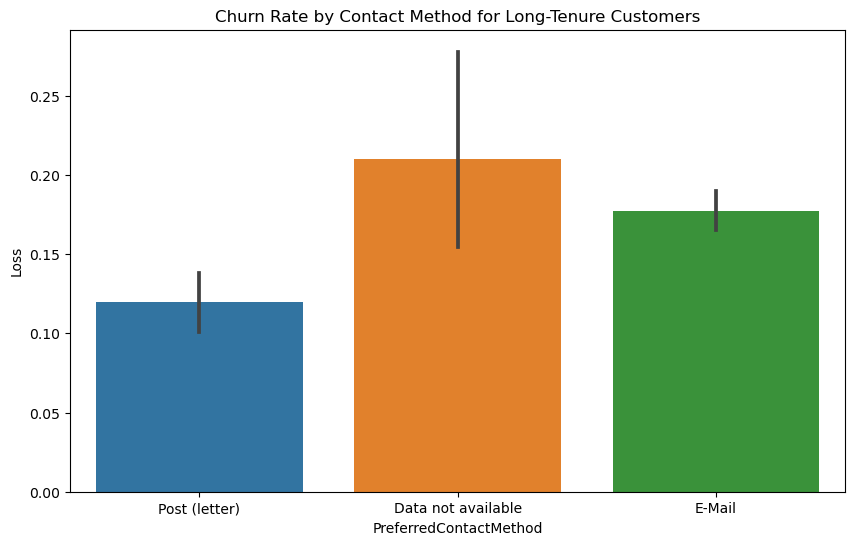

In [30]:
# Behavioural Analysis

# Payment frequency analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentFrequency', y='Loss', data=long_tenure_customers)
plt.title('Churn Rate by Payment Frequency for Long-Tenure Customers')
plt.show()

# Complaint type analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='ComplaintType', y='Loss', data=long_tenure_customers)
plt.title('Churn Rate by Complaint Type for Long-Tenure Customers')
plt.xticks(rotation=45)
plt.show()

# Preferred Contact Methods
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredContactMethod', y='Loss', data=long_tenure_customers)
plt.title('Churn Rate by Contact Method for Long-Tenure Customers')
plt.show()

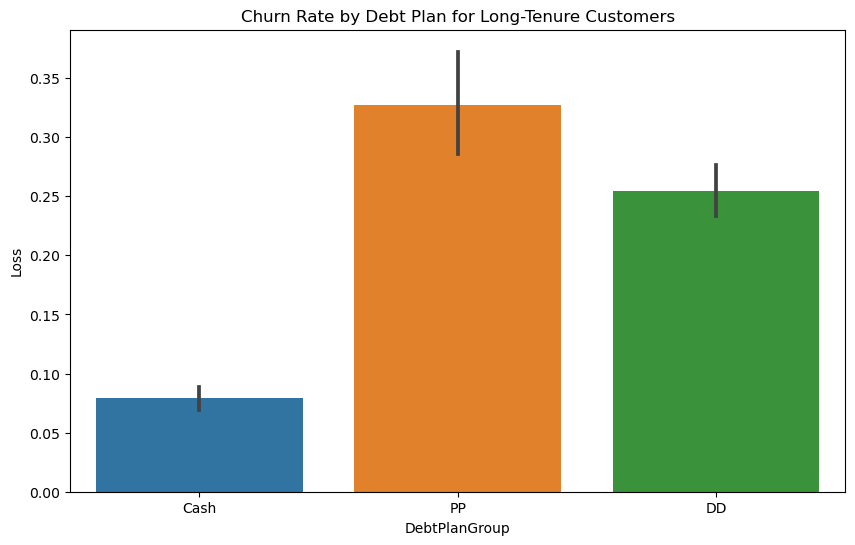

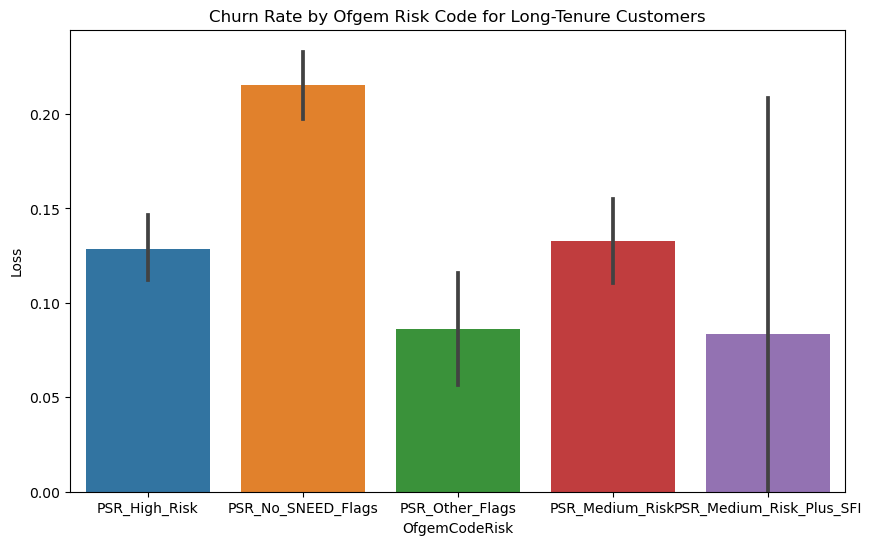

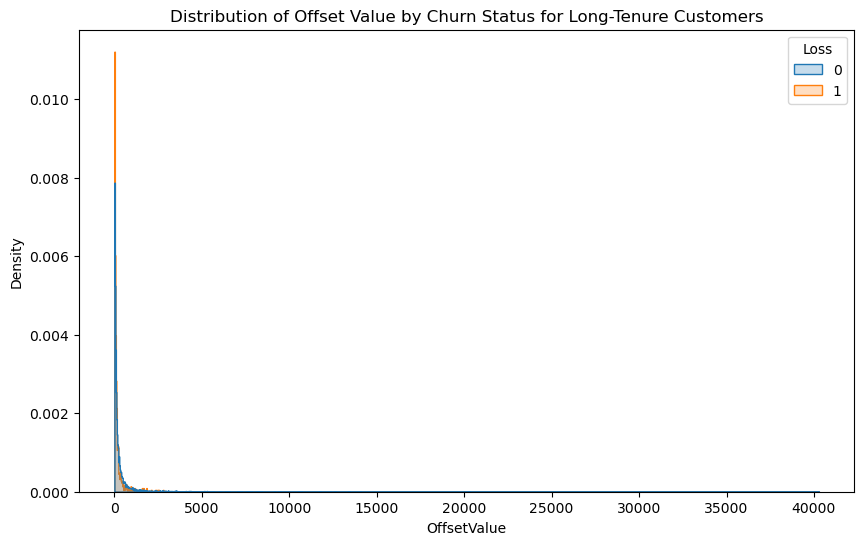

In [31]:
# Risk and Financial Analysis

# Analyze Debt Plan
plt.figure(figsize=(10, 6))
sns.barplot(x='DebtPlanGroup', y='Loss', data=long_tenure_customers)
plt.title('Churn Rate by Debt Plan for Long-Tenure Customers')
plt.show()

# Analyze risk code
plt.figure(figsize=(10, 6))
sns.barplot(x='OfgemCodeRisk', y='Loss', data=long_tenure_customers)
plt.title('Churn Rate by Ofgem Risk Code for Long-Tenure Customers')
plt.show()

# Offset value analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=long_tenure_customers, x='OffsetValue', hue='Loss', element='step', stat='density', common_norm=False)
plt.title('Distribution of Offset Value by Churn Status for Long-Tenure Customers')
plt.show()

# Feature Importance for Short Tenure Customers

In [37]:
# For Short_Tenure_Customers

short_tenure_customers

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,...,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,Churn,month
1,2024-05-15 00:00:00.000000,1,2022-11-19,Domestic,No,27.88,Cash,Monthly,Complaint,Closed,...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,17,True,5
2,2024-05-29 00:00:00.000000,1,2023-05-31,Domestic,No,66.87,Cash,Monthly,Complaint,Closed,...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2,11,True,5
6,2024-05-08 00:00:00.000000,1,2024-04-16,Domestic,No,28.22,DD,Monthly,Complaint,Closed,...,Upmarket Browsers,Affluent older families in suburban areas with...,Established Investors,Prime Capital,191450,Detached,2,0,True,5
15,2024-05-06 00:00:00.000000,1,2022-10-01,Domestic,No,4.67,PP,Weekly,Complaint,Closed,...,Tentative Elders,Elderly singles and households with little to ...,Cash Economy,Ageing Basics,19920,Semi-Detached,2,18,True,5
17,2024-05-09 00:00:00.000000,1,2024-04-25,Domestic,No,27.45,Cash,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Single Earners,Stepping-stone Singles,29364,Terraced,2,0,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,2024-09-03 19:45:53.345133,0,2023-01-18,Domestic,No,146.78,Cash,Monthly,Complaint,Closed,...,First-Gen Parents,Members of the first digital generation who ar...,Single Earners,Stepping-stone Singles,23067,Flat,2,19,True,9
4937,2024-09-03 19:45:53.348125,0,2023-01-25,Domestic,No,372.28,Cash,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Mutual Resources,Family Networks,26276,Semi-Detached,2,18,True,9
4941,2024-09-03 19:45:53.349126,0,2023-01-24,Domestic,No,1283.96,Cash,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Family Pressures,Budget Deficit,14588,Terraced,2,18,True,9
4945,2024-09-03 19:45:53.349126,0,2023-01-19,Domestic,Yes,47.26,Cash,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Single Earners,Freewheeling Renters,10468,Flat,1,19,True,9


In [38]:
short_tenure_customers = short_tenure_customers.drop(['LossDate', 'AccountStartdate', 'MosaicTypeDesc', 'MosaicDigitalGroupDesc'], axis = 1)

In [39]:
short_tenure_customers

,Loss,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,...,MosaicType,MosaicDigitalGroup,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,Churn,month
1,1,Domestic,No,27.88,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Contemporary Starts,First-Gen Parents,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,17,True,5
2,1,Domestic,No,66.87,Cash,Monthly,Complaint,Closed,Person,Unknown,...,Central Pulse,Digital Frontier,Money Makers,City Buzz,54227,Flat,2,11,True,5
6,1,Domestic,No,28.22,DD,Monthly,Complaint,Closed,Person,Type not available,...,Premium Fortunes,Upmarket Browsers,Established Investors,Prime Capital,191450,Detached,2,0,True,5
15,1,Domestic,No,4.67,PP,Weekly,Complaint,Closed,Person,Type not available,...,Mature Workers,Tentative Elders,Cash Economy,Ageing Basics,19920,Semi-Detached,2,18,True,5
17,1,Domestic,No,27.45,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Economical Families,Online Escapists,Single Earners,Stepping-stone Singles,29364,Terraced,2,0,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,0,Domestic,No,146.78,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Bus-Route Renters,First-Gen Parents,Single Earners,Stepping-stone Singles,23067,Flat,2,19,True,9
4937,0,Domestic,No,372.28,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Back with the Folks,Online Escapists,Mutual Resources,Family Networks,26276,Semi-Detached,2,18,True,9
4941,0,Domestic,No,1283.96,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Families on a Budget,Online Escapists,Family Pressures,Budget Deficit,14588,Terraced,2,18,True,9
4945,0,Domestic,Yes,47.26,Cash,Monthly,Complaint,Closed,Person,Tenant,...,Single Essentials,Online Escapists,Single Earners,Freewheeling Renters,10468,Flat,1,19,True,9


In [40]:
# Label Encoding the variables

from sklearn.preprocessing import LabelEncoder

categorical_columns = short_tenure_customers.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder object
label_encoders = {}

# Apply Label Encoding to all categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    short_tenure_customers[column] = le.fit_transform(short_tenure_customers[column].astype(str))
    label_encoders[column] = le  # Store the encoder for each column if you need to inverse transform later

# df now has all categorical columns encoded as integers
print(short_tenure_customers.head())

    Loss  AccountDeterminationGroup  InstallmentPlan  OffsetValue  \
1      1                          0                0        27.88   
2      1                          0                0        66.87   
6      1                          0                0        28.22   
15     1                          0                0         4.67   
17     1                          0                0        27.45   

    DebtPlanGroup  PaymentFrequency  ComplaintType  StatusGrouping  \
1               0                 0              0               0   
2               0                 0              0               0   
6               1                 0              0               0   
15              2                 2              0               0   
17              0                 0              0               0   

    CustomerCategory  CustomerType  ...  MosaicType  MosaicDigitalGroup  \
1                  1            10  ...          15                   5   
2             

In [41]:
short_tenure_customers = short_tenure_customers.drop(['Churn'], axis = 1)

In [42]:
short_tenure_customers

,Loss,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,...,MosaicGroup,MosaicType,MosaicDigitalGroup,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,month
1,1,0,0,27.88,0,0,0,0,1,10,...,0,15,5,2,11,25973,3,2,17,5
2,1,0,0,66.87,0,0,0,0,1,11,...,8,11,4,10,6,54227,2,2,11,5
6,1,0,0,28.22,1,0,0,0,1,10,...,7,46,11,5,37,191450,1,2,0,5
15,1,0,0,4.67,2,2,0,0,1,10,...,6,37,9,1,1,19920,3,2,18,5
17,1,0,0,27.45,0,0,0,0,1,10,...,4,20,7,13,46,29364,4,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,0,0,0,146.78,0,0,0,0,1,10,...,8,8,5,13,46,23067,2,2,19,9
4937,0,0,0,372.28,0,0,0,0,1,10,...,5,3,7,11,20,26276,3,2,18,9
4941,0,0,0,1283.96,0,0,0,0,1,10,...,4,23,7,6,4,14588,4,2,18,9
4945,0,0,1,47.26,0,0,0,0,1,9,...,6,54,7,13,22,10468,2,1,19,9


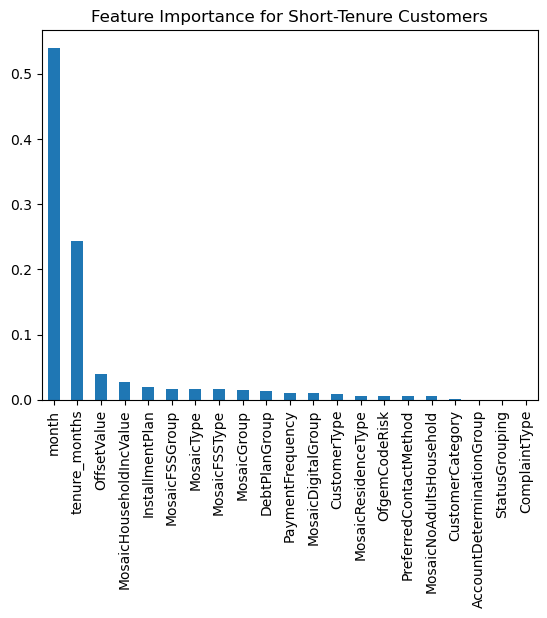

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_short = short_tenure_customers.drop(['Loss'], axis=1)
y_short = short_tenure_customers['Loss']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_short, y_short)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_short.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='Feature Importance for Short-Tenure Customers')
plt.show()


In [46]:
from scipy import stats
# 1. Hypothesis 1: Test for MosaicHouseholdincvalue
# Independent t-test for MosaicHouseholdincvalue between churned and non-churned customers
churned = short_tenure_customers[short_tenure_customers['Loss'] == 1]['MosaicHouseholdIncValue']
not_churned = short_tenure_customers[short_tenure_customers['Loss'] == 0]['MosaicHouseholdIncValue']
t_stat, p_value = stats.ttest_ind(churned, not_churned, nan_policy='omit')
print(f'Hypothesis 1 - T-test for MosaicHouseholdIncValue: t_stat={t_stat}, p_value={p_value}')

Hypothesis 1 - T-test for MosaicHouseholdIncValue: t_stat=1.3161474724512674, p_value=0.18916033618351932


In [47]:
# 2. Hypothesis 2: Test for Installment Plan
# Chi-square test for Installment Plan types between churned and non-churned customers
installment_plan_contingency = pd.crosstab(short_tenure_customers['InstallmentPlan'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(installment_plan_contingency)
print(f'Hypothesis 2 - Chi-square for Installment Plan: chi2={chi2}, p_value={p}')

Hypothesis 2 - Chi-square for Installment Plan: chi2=22.030981910124076, p_value=2.682847472795165e-06


In [48]:
# 3. Hypothesis 3: Test for MosaicType
# Chi-square test for MosaicType between churned and non-churned customers
mosaic_type_contingency = pd.crosstab(short_tenure_customers['MosaicType'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(mosaic_type_contingency)
print(f'Hypothesis 3 - Chi-square for MosaicType: chi2={chi2}, p_value={p}')


Hypothesis 3 - Chi-square for MosaicType: chi2=62.68632468951568, p_value=0.4874474566472519


In [49]:
# 4. Hypothesis 4: Test for MosaicGroup
# Chi-square test for MosaicGroup between churned and non-churned customers
mosaic_group_contingency = pd.crosstab(short_tenure_customers['MosaicGroup'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(mosaic_group_contingency)
print(f'Hypothesis 4 - Chi-square for MosaicGroup: chi2={chi2}, p_value={p}')

Hypothesis 4 - Chi-square for MosaicGroup: chi2=15.269320852421949, p_value=0.4321971771137455


In [50]:
# 5. Hypothesis 5: Test for DebtPlanGroup
# Chi-square test for DebtPlanGroup between churned and non-churned customers
debt_plan_group_contingency = pd.crosstab(short_tenure_customers['DebtPlanGroup'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(debt_plan_group_contingency)
print(f'Hypothesis 5 - Chi-square for DebtPlanGroup: chi2={chi2}, p_value={p}')

Hypothesis 5 - Chi-square for DebtPlanGroup: chi2=7.664072447076734, p_value=0.021665454975234644


In [51]:
# 6. Hypothesis 6: Test for OfgemRiskCode
# Chi-square test for OfgemRiskCode between churned and non-churned customers
ofgem_risk_code_contingency = pd.crosstab(short_tenure_customers['OfgemCodeRisk'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(ofgem_risk_code_contingency)
print(f'Hypothesis 6 - Chi-square for OfgemRiskCode: chi2={chi2}, p_value={p}')

Hypothesis 6 - Chi-square for OfgemRiskCode: chi2=3.2626179056886, p_value=0.35287951664774775


In [52]:
# 7. Hypothesis 7: Test for Offset Value
# Chi-square test for Installment Plan types between churned and non-churned customers
offset_contingency = pd.crosstab(short_tenure_customers['OffsetValue'], short_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(offset_contingency)
print(f'Hypothesis 2 - Chi-square for Offset Value: chi2={chi2}, p_value={p}')

Hypothesis 2 - Chi-square for Offset Value: chi2=284.11293995859216, p_value=0.4038771907182026


# Feature Importance for Long Tenure Customers

In [53]:
# Long term Customers

long_tenure_customers

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,...,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,Churn,month
0,2024-05-08 00:00:00.000000,1,2014-02-20,Domestic,No,488.17,Cash,Monthly,Complaint,Closed,...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,120,True,5
3,2024-05-06 00:00:00.000000,1,2013-09-24,Domestic,No,46.65,Cash,Quarterly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2,125,True,5
4,2024-05-16 00:00:00.000000,1,2019-04-06,Domestic,No,1145.62,Cash,Monthly,Complaint,Closed,...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,60,True,5
5,2024-05-08 00:00:00.000000,1,2014-06-22,Domestic,No,923.06,PP,Weekly,Complaint,Closed,...,Tentative Elders,Elderly singles and households with little to ...,Cash Economy,Subsidised Living,22214,Semi-Detached,2,116,True,5
7,2024-05-21 00:00:00.000000,1,2018-08-06,Domestic,No,110.11,Cash,Monthly,Complaint,Closed,...,Aspirant Frontier,Young singles and students exploring the cutti...,Earning Potential,Trending Renters,56486,Terraced,1,68,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-09-03 19:45:53.358099,0,2021-07-14,Domestic,No,4.22,DD,Monthly,Complaint,Closed,...,Upmarket Browsers,Affluent older families in suburban areas with...,Growth Phase,Mid-way Mortgages,47663,Semi-Detached,2,37,True,9
4996,2024-09-03 19:45:53.358099,0,2022-08-08,Domestic,No,72.77,DD,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Earning Potential,Living Wage Youth,12950,Semi-Detached,1,24,True,9
4997,2024-09-03 19:45:53.358099,0,2015-06-16,Domestic,Yes,30.24,Cash,Monthly,Complaint,Closed,...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Ageing Basics,15725,Terraced,2,108,True,9
4998,2024-09-03 19:45:53.358099,0,2017-02-20,Domestic,No,18.00,DD,Monthly,Complaint,Closed,...,First-Gen Parents,Members of the first digital generation who ar...,Earning Potential,Domestic Startups,67138,Semi-Detached,2,88,True,9


In [54]:
long_tenure_customers = long_tenure_customers.drop(['LossDate', 'AccountStartdate', 'MosaicTypeDesc', 'MosaicDigitalGroupDesc', 'Churn'], axis = 1)

In [55]:
# Label Encoding the variables

from sklearn.preprocessing import LabelEncoder

categorical_columns = long_tenure_customers.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder object
label_encoders = {}

# Apply Label Encoding to all categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    long_tenure_customers[column] = le.fit_transform(long_tenure_customers[column].astype(str))
    label_encoders[column] = le  # Store the encoder for each column if you need to inverse transform later

# df now has all categorical columns encoded as integers
print(long_tenure_customers.head())

   Loss  AccountDeterminationGroup  InstallmentPlan  OffsetValue  \
0     1                          0                0       488.17   
3     1                          0                0        46.65   
4     1                          0                0      1145.62   
5     1                          0                0       923.06   
7     1                          0                0       110.11   

   DebtPlanGroup  PaymentFrequency  ComplaintType  StatusGrouping  \
0              0                 0              0               0   
3              0                 1              0               0   
4              0                 0              0               0   
5              2                 2              0               0   
7              0                 0              0               0   

   CustomerCategory  CustomerType  ...  MosaicGroup  MosaicType  \
0                 1            15  ...           15          45   
3                 1            15  ...    

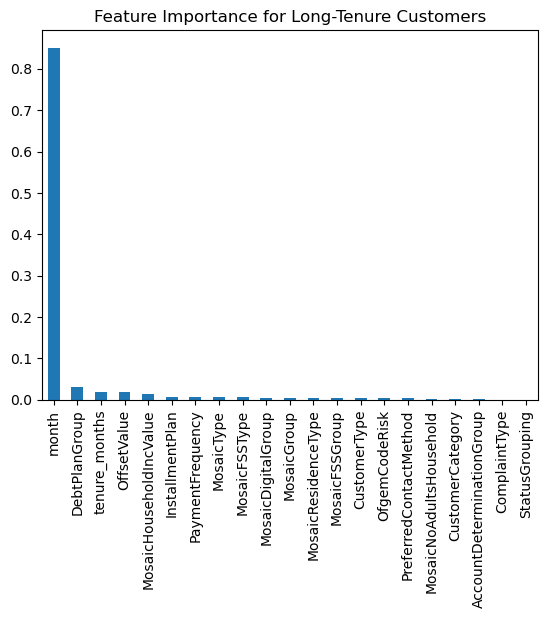

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_long = long_tenure_customers.drop(['Loss'], axis=1)
y_long = long_tenure_customers['Loss']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_long, y_long)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_long.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='Feature Importance for Long-Tenure Customers')
plt.show()


In [57]:
# 1. Hypothesis 1: Test for MosaicHouseholdincvalue
# Independent t-test for MosaicHouseholdincvalue between churned and non-churned customers
churned = long_tenure_customers[long_tenure_customers['Loss'] == 1]['MosaicHouseholdIncValue']
not_churned = long_tenure_customers[long_tenure_customers['Loss'] == 0]['MosaicHouseholdIncValue']
t_stat, p_value = stats.ttest_ind(churned, not_churned, nan_policy='omit')
print(f'Hypothesis 1 - T-test for MosaicHouseholdIncValue: t_stat={t_stat}, p_value={p_value}')

Hypothesis 1 - T-test for MosaicHouseholdIncValue: t_stat=3.520440956714561, p_value=0.0004349122276460622


In [58]:
# 2. Hypothesis 2: Test for Installment Plan
# Chi-square test for Installment Plan types between churned and non-churned customers
installment_plan_contingency = pd.crosstab(long_tenure_customers['InstallmentPlan'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(installment_plan_contingency)
print(f'Hypothesis 2 - Chi-square for Installment Plan: chi2={chi2}, p_value={p}')

Hypothesis 2 - Chi-square for Installment Plan: chi2=89.0766300131104, p_value=3.798114258011881e-21


In [59]:
# 3. Hypothesis 3: Test for MosaicType
# Chi-square test for MosaicType between churned and non-churned customers
mosaic_type_contingency = pd.crosstab(long_tenure_customers['MosaicType'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(mosaic_type_contingency)
print(f'Hypothesis 3 - Chi-square for MosaicType: chi2={chi2}, p_value={p}')

Hypothesis 3 - Chi-square for MosaicType: chi2=101.56721775611527, p_value=0.003229072102117024


In [60]:
# 4. Hypothesis 4: Test for MosaicGroup
# Chi-square test for MosaicGroup between churned and non-churned customers
mosaic_group_contingency = pd.crosstab(long_tenure_customers['MosaicGroup'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(mosaic_group_contingency)
print(f'Hypothesis 4 - Chi-square for MosaicGroup: chi2={chi2}, p_value={p}')

Hypothesis 4 - Chi-square for MosaicGroup: chi2=52.12053754444378, p_value=5.395072080713291e-06


In [61]:
# 5. Hypothesis 5: Test for DebtPlanGroup
# Chi-square test for DebtPlanGroup between churned and non-churned customers
debt_plan_group_contingency = pd.crosstab(long_tenure_customers['DebtPlanGroup'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(debt_plan_group_contingency)
print(f'Hypothesis 5 - Chi-square for DebtPlanGroup: chi2={chi2}, p_value={p}')

Hypothesis 5 - Chi-square for DebtPlanGroup: chi2=317.6777363747696, p_value=1.0402938582009833e-69


In [62]:
# 6. Hypothesis 6: Test for OfgemRiskCode
# Chi-square test for OfgemRiskCode between churned and non-churned customers
ofgem_risk_code_contingency = pd.crosstab(long_tenure_customers['OfgemCodeRisk'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(ofgem_risk_code_contingency)
print(f'Hypothesis 6 - Chi-square for OfgemRiskCode: chi2={chi2}, p_value={p}')

Hypothesis 6 - Chi-square for OfgemRiskCode: chi2=74.82563469822533, p_value=2.16918221013015e-15


In [63]:
# 7. Hypothesis 7: Test for Offset Value
# Chi-square test for Installment Plan types between churned and non-churned customers
offset_contingency = pd.crosstab(long_tenure_customers['OffsetValue'], long_tenure_customers['Loss'])
chi2, p, dof, expected = stats.chi2_contingency(offset_contingency)
print(f'Hypothesis 2 - Chi-square for Offset Value: chi2={chi2}, p_value={p}')

Hypothesis 2 - Chi-square for Offset Value: chi2=4179.1504122821, p_value=0.146374027407373


# Final Modeling

In [32]:
# Removing unnecessary columns from the dataset

df = df.drop(['LossDate', 'AccountStartdate', 'MosaicTypeDesc', 'MosaicDigitalGroupDesc'], axis = 1)

In [33]:
df

,Loss,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,...,MosaicType,MosaicDigitalGroup,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,Churn,month
0,1,Domestic,No,488.17,Cash,Monthly,Complaint,Closed,Person,Unknown,...,Pocket Pensions,Tentative Elders,Declining Years,Elderly Assistance,9264,Flat,1,120,True,5
1,1,Domestic,No,27.88,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Contemporary Starts,First-Gen Parents,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,17,True,5
2,1,Domestic,No,66.87,Cash,Monthly,Complaint,Closed,Person,Unknown,...,Central Pulse,Digital Frontier,Money Makers,City Buzz,54227,Flat,2,11,True,5
3,1,Domestic,No,46.65,Cash,Quarterly,Complaint,Closed,Person,Unknown,...,Mature Workers,Online Escapists,Cash Economy,Workaday Families,22953,Terraced,2,125,True,5
4,1,Domestic,No,1145.62,Cash,Monthly,Complaint,Closed,Person,Type not available,...,Pocket Pensions,Tentative Elders,Declining Years,Elderly Assistance,9264,Flat,1,60,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,Domestic,No,4.22,DD,Monthly,Complaint,Closed,Person,Type not available,...,Cafes and Catchments,Upmarket Browsers,Growth Phase,Mid-way Mortgages,47663,Semi-Detached,2,37,True,9
4996,0,Domestic,No,72.77,DD,Monthly,Complaint,Closed,Person,Unknown,...,Value Rentals,Online Escapists,Earning Potential,Living Wage Youth,12950,Semi-Detached,1,24,True,9
4997,0,Domestic,Yes,30.24,Cash,Monthly,Complaint,Closed,Person,Unknown,...,Inner City Stalwarts,Online Escapists,Cash Economy,Ageing Basics,15725,Terraced,2,108,True,9
4998,0,Domestic,No,18.00,DD,Monthly,Complaint,Closed,Person,Owner,...,Contemporary Starts,First-Gen Parents,Earning Potential,Domestic Startups,67138,Semi-Detached,2,88,True,9


In [34]:
# Label Encoding the variables

from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder object
label_encoders = {}

# Apply Label Encoding to all categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le  # Store the encoder for each column if you need to inverse transform later

# df now has all categorical columns encoded as integers
print(df.head())



   Loss  AccountDeterminationGroup  InstallmentPlan  OffsetValue  \
0     1                          0                0       488.17   
1     1                          0                0        27.88   
2     1                          0                0        66.87   
3     1                          0                0        46.65   
4     1                          0                0      1145.62   

   DebtPlanGroup  PaymentFrequency  ComplaintType  StatusGrouping  \
0              0                 0              0               0   
1              0                 0              0               0   
2              0                 0              0               0   
3              0                 1              0               0   
4              0                 0              0               0   

   CustomerCategory  CustomerType  ...  MosaicType  MosaicDigitalGroup  \
0                 1            16  ...          45                   9   
1                 1         

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loss                       5000 non-null   int64  
 1   AccountDeterminationGroup  5000 non-null   int32  
 2   InstallmentPlan            5000 non-null   int32  
 3   OffsetValue                5000 non-null   float64
 4   DebtPlanGroup              5000 non-null   int32  
 5   PaymentFrequency           5000 non-null   int32  
 6   ComplaintType              5000 non-null   int32  
 7   StatusGrouping             5000 non-null   int32  
 8   CustomerCategory           5000 non-null   int32  
 9   CustomerType               5000 non-null   int32  
 10  PreferredContactMethod     5000 non-null   int32  
 11  OfgemCodeRisk              5000 non-null   int32  
 12  MosaicGroup                5000 non-null   int32  
 13  MosaicType                 5000 non-null   int32

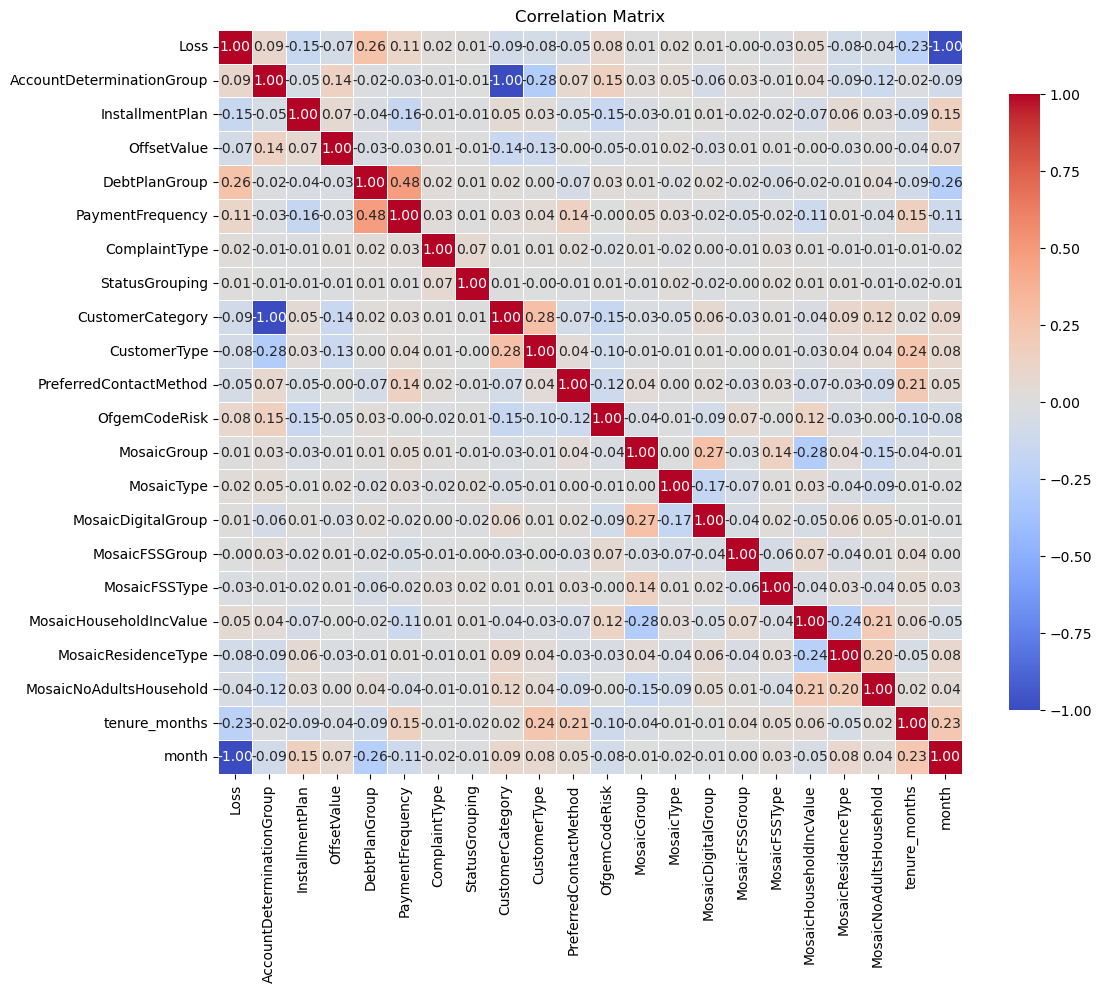

In [36]:
# Finding correlations with the numerical variables

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=.5, 
            cbar_kws={"shrink": 0.8, "aspect": 20})
plt.title('Correlation Matrix')
plt.show()

In [64]:

df = df.drop(['Churn'], axis = 1)

In [65]:
df

,Loss,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,...,MosaicGroup,MosaicType,MosaicDigitalGroup,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,tenure_months,month
0,1,0,0,488.17,0,0,0,0,1,16,...,15,45,9,3,18,9264,2,1,120,5
1,1,0,0,27.88,0,0,0,0,1,15,...,0,15,5,2,12,25973,3,2,17,5
2,1,0,0,66.87,0,0,0,0,1,16,...,8,11,4,10,7,54227,2,2,11,5
3,1,0,0,46.65,0,1,0,0,1,16,...,6,37,7,1,54,22953,4,2,125,5
4,1,0,0,1145.62,0,0,0,0,1,15,...,15,45,9,3,18,9264,2,1,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,4.22,1,0,0,0,1,15,...,3,9,11,8,36,47663,3,2,37,9
4996,0,0,0,72.77,1,0,0,0,1,16,...,12,62,7,4,30,12950,3,1,24,9
4997,0,0,1,30.24,0,0,0,0,1,16,...,6,32,7,1,1,15725,4,2,108,9
4998,0,0,0,18.00,1,0,0,0,1,9,...,0,15,5,4,15,67138,3,2,88,9


In [66]:
# Separating the features and the target variable

X = df.drop('Loss', axis = 1)
y = df['Loss']

In [67]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Displaying the dataset size after train_test_split

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3500, 21)
Shape of X_test: (1500, 21)
Shape of y_train: (3500,)
Shape of y_test: (1500,)


In [69]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [80]:
# Train XGBoost on the resampled data

from xgboost import XGBClassifier

params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 3,                 # Max depth of trees. Lower value to avoid complex models.
    'min_child_weight': 6,          # Minimum sum of instance weight (hessian) needed in a child.
    'eta': 0.03,                    # Learning rate (lower values prevent overfitting)
    'subsample': 0.8,               # Fraction of instances to be randomly sampled for each tree.
    'colsample_bytree': 0.8,        # Fraction of columns to be randomly sampled for each tree.
    'lambda': 1,                    # L2 regularization term on weights (higher values prevent overfitting)
    'alpha': 0.1,                   # L1 regularization term on weights
    'eval_metric': 'logloss',       # Evaluation metric for validation data
    'seed': 42                      # Random seed for reproducibility
}

# Number of boosting rounds
num_boost_round = 600

model = XGBClassifier(params = params, num_boost_round=num_boost_round)
model.fit(X_resampled, y_resampled)

C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_boost_round=600, num_parallel_tree=None, ...)

In [81]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[1184    0]
 [   0  316]]


In [83]:
# Reports for XGB Classifier

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

1.0
[[1184    0]
 [   0  316]]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

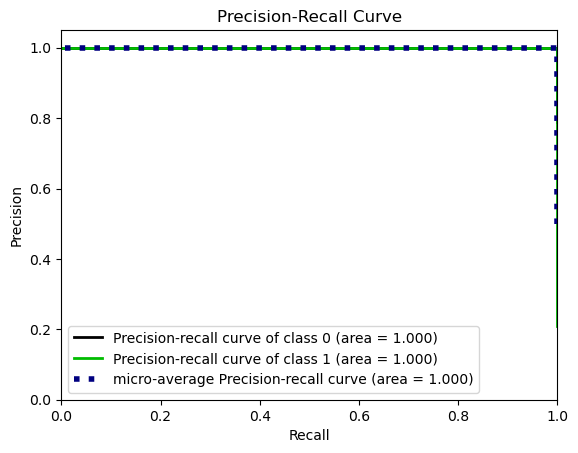

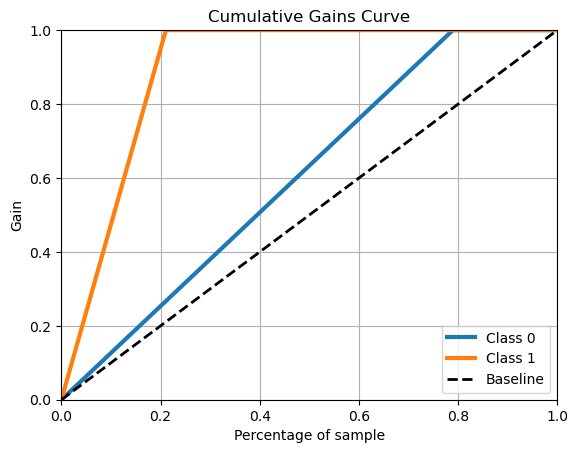

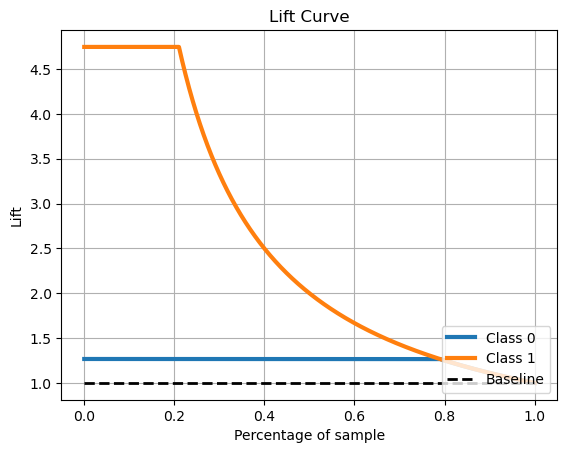

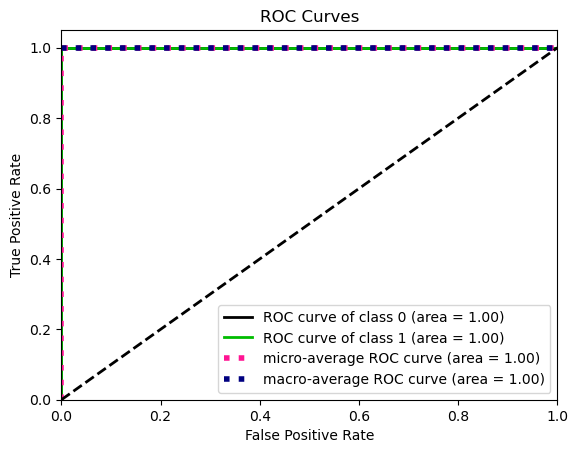

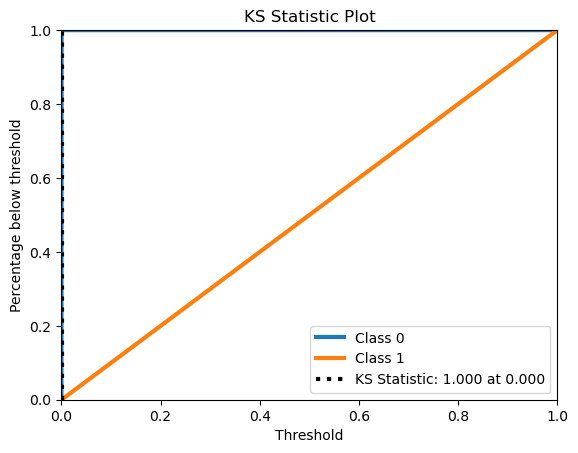

In [84]:
# Precision Recall Curve for XGB

import scikitplot as skplt

y_pred_test  =model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)

skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = model.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)

In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round", "params" } are not used.

  warnings.warn(smsg, UserWarning)


In [110]:
# Standardize the feature variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2

# Build the deep learning model
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6274 - loss: 2.1698 - val_accuracy: 0.8129 - val_loss: 1.4621
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 1.4072 - val_accuracy: 0.9900 - val_loss: 0.9086
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.9122 - val_accuracy: 1.0000 - val_loss: 0.5983
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.6111 - val_accuracy: 1.0000 - val_loss: 0.4166
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.4275 - val_accuracy: 1.0000 - val_loss: 0.2994
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.3123 - val_accuracy: 1.0000 - val_loss: 0.2203
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.2325 - val_accuracy: 1.0000 - val_loss: 0.1664
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.1835 - val_accuracy: 1.0000 - v

In [120]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print classification report and confusion matrix
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 1.0000 - loss: 0.0416
Test Accuracy: 1.00
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1184    0]
 [   0  316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       316

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



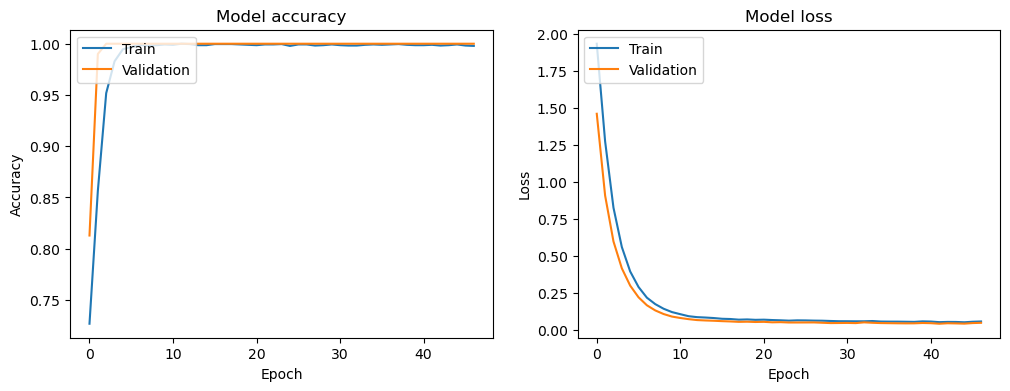

In [121]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()